In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 22

from engine import RMG
from agent import TFT, Mem1FPLearningAgent, DummyAgent, Citizen, FPLearningAgent

### Plotting utils

In [2]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [3]:
def plot(r0ss, r1ss, path):
    
    # We set a fancy theme
    # plt.style.use('ggplot')
    


    plt.axis([0, len(r0ss[0]), 0, 6])
    


    plt.plot(moving_average(np.asarray(r0ss).mean(axis=0), 100), 'r', alpha=0.5)
    plt.plot(moving_average(np.asarray(r1ss).mean(axis=0), 100), 'b', alpha=0.5)
    
    
    for i in range(N_EXP):
        plt.plot(moving_average(r0ss[i], 100), 'r', alpha=0.05)
        plt.plot(moving_average(r1ss[i], 100), 'b', alpha=0.05)
    

    plt.xlabel('time, t');
    plt.ylabel('Rewards');
    

    #plt.autoscale(tight=True)

    plt.legend(['DDO', 'Citizen']);
    
    #plt.show()
    
    if path is not None:

        plt.savefig(path, dpi=100)
        
    plt.show()
    
    

In [4]:
def plot_social_ut(sut, path):
    
    # We set a fancy theme
    # plt.style.use('ggplot')
    

    plt.axis([0, len(sut[0]), 0, 6])
    

    plt.plot(moving_average(np.asarray(sut).mean(axis=0), 100), 'g', alpha=0.5)
    #plt.plot(moving_average(np.asarray(r1ss).mean(axis=0), 100), 'b', alpha=0.5)
    #plt.plot(moving_average(np.asarray(r0ss_mem1).mean(axis=0), 100), 'm', alpha=0.5)
    #plt.plot(moving_average(np.asarray(r1ss_tft).mean(axis=0), 100), 'r', alpha=0.5)

    for i in range(N_EXP):
        plt.plot(moving_average(sut[i], 100), 'g', alpha=0.05)
        #plt.plot(moving_average(r1ss[i], 100), 'b', alpha=0.05)
        #plt.plot(moving_average(r0ss_mem1[i], 100), 'r', alpha=0.05)
        #plt.plot(moving_average(r1ss_tft[i], 100), 'm', alpha=0.05)

    plt.xlabel('time, t');
    plt.ylabel('Social utility');
    plt.ylim(0,6);

    #plt.autoscale(tight=True)

    #plt.legend(['DDO', 'Citizen']);
    
    #plt.show()
    
    if path is not None:

        plt.savefig(path, dpi=100)
        
    plt.show()

In [5]:
def plot_several_ut(list_sut, path):
    
    # We set a fancy theme
    # plt.style.use('ggplot')
    

    plt.axis([0, len(list_sut[0][0]), 3, 5])
    
    plt.plot(moving_average(np.asarray(list_sut[0]).mean(axis=0), 100), 'b', alpha=0.5)
    plt.plot(moving_average(np.asarray(list_sut[1]).mean(axis=0), 100), 'r', alpha=0.5)
        #plt.plot(moving_average(np.asarray(r1ss).mean(axis=0), 100), 'b', alpha=0.5)
        #plt.plot(moving_average(np.asarray(r0ss_mem1).mean(axis=0), 100), 'm', alpha=0.5)
        #plt.plot(moving_average(np.asarray(r1ss_tft).mean(axis=0), 100), 'r', alpha=0.5)

    for i in range( len(list_sut[0] )):
        plt.plot(moving_average(list_sut[0][i], 100), 'b', alpha=0.05)#, 'g', alpha=0.05)
        #plt.plot(moving_average(r1ss[i], 100), 'b', alpha=0.05)
        #plt.plot(moving_average(r0ss_mem1[i], 100), 'r', alpha=0.05)

        #plt.plot(moving_average(r1ss_tft[i], 100), 'm', alpha=0.05)
            
    
        #plt.plot(moving_average(np.asarray(r1ss).mean(axis=0), 100), 'b', alpha=0.5)
        #plt.plot(moving_average(np.asarray(r0ss_mem1).mean(axis=0), 100), 'm', alpha=0.5)
        #plt.plot(moving_average(np.asarray(r1ss_tft).mean(axis=0), 100), 'r', alpha=0.5)

    for i in range( len(list_sut[1] )):
        plt.plot(moving_average(list_sut[1][i], 100), 'r', alpha=0.05)#, 'g', alpha=0.05)
        #plt.plot(moving_average(r1ss[i], 100), 'b', alpha=0.05)
        #plt.plot(moving_average(r0ss_mem1[i], 100), 'r', alpha=0.05)
    
    plt.legend(['TfT', 'Forgiving TfT']);
    plt.xlabel('time, t');
    plt.ylabel('Social utility');
    plt.ylim(1,5);

    #plt.autoscale(tight=True)

    
    
    #plt.show()
    
    if path is not None:

        plt.savefig(path, dpi=100)
        
    plt.show()

# Selfish DDO

In [6]:
N_EXP = 10

r0ss_cit = []
r1ss_ddo = []
sut = []

for n in range(N_EXP):

    batch_size = 1
    max_steps = 20
    gamma = 0.96

    # Reward matrix for the Iterated Prisoner's Dilemma
    ipd_rewards = np.array([[1.0, 0.], [6.0, 5.0]])
    #np.array([[5.0, 0.0], [6.0, 1.0]])

    env = RMG(max_steps=max_steps, payouts=ipd_rewards, batch_size=batch_size)
    env.reset()

    possible_actions = [0, 1]  # Defect or Cooperate

    #p0, p1 = TFT(possible_actions),TFT(possible_actions)
    #p0, p1 = Citizen(possible_actions, possible_actions, n_states=1, epsilon=0.0, rmx=ipd_rewards), DummyAgent(possible_actions)

    p0, p1 = Mem1FPLearningAgent(possible_actions, possible_actions,
                                n_states=1, learning_rate=0.05, epsilon=0.001, gamma=gamma), DummyAgent(possible_actions)




    n_iter = 1000

    r0s = []
    r1s = []
    suts = []

    a0s = []
    a1s = []

    a0_prev = None
    a1_prev = None

    # State = Memory

    for i in range(n_iter):

        # A full episode:
        done = False

        while not done:

            # Agents decide

            #a0 = p0.act()
            #a1 = p1.act()

            a0 = p0.act( (a0_prev,a1_prev) )
            a1 = p1.act( (a1_prev,a0_prev) )

            # World changes
            _, (r0, r1), done, _ = env.step(([a0], [a1]))

            # Agents learn

            p0.update((a0_prev, a1_prev), (a0, a1), (r0, r1), (a0,a1) )
            p1.update((a1_prev, a0_prev), (a1, a0), (r1, r0), (a1,a0) )

            #s = new_s  #stateless!

            #print(a0, a1)
            r0s.append(r0[0])
            r1s.append(r1[0])
            suts.append( (r0[0] + r1[0])/2.0 )
            
    
            a0s.append(a0)
            a1s.append(a1)



            a0_prev = a0
            a1_prev = a1


        env.reset()
        
    print(n)
    r0ss_cit.append(r0s)
    r1ss_ddo.append(r1s)
    sut.append(suts)

0
1
2
3
4
5
6
7
8
9


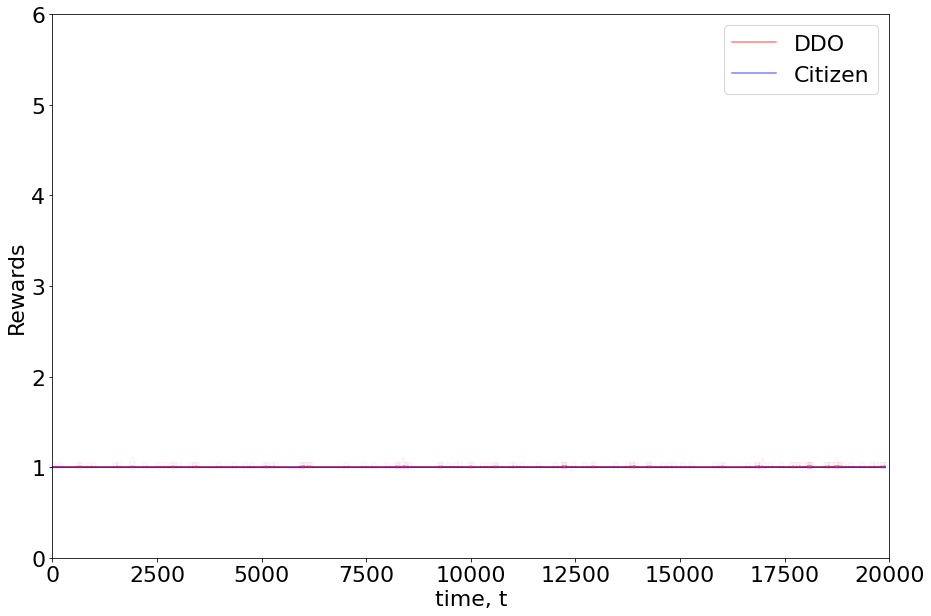

In [7]:
plot(r1ss_ddo, r0ss_cit, path="img/selfish_ddo.png")

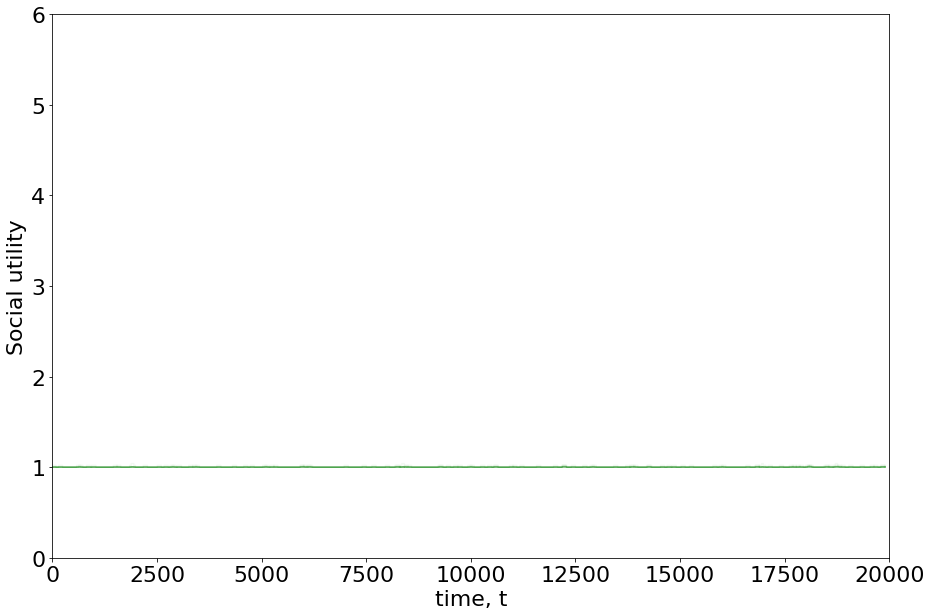

In [8]:
plot_social_ut(sut, path="img/selfish_ddo_sut.png")

# TfT DDO

In [21]:
N_EXP = 10

r0ss_cit = []
r1ss_ddo = []
sut = []

for n in range(N_EXP):

    batch_size = 1
    max_steps = 20
    gamma = 0.7

    # Reward matrix for the Iterated Prisoner's Dilemma
    ipd_rewards = np.array([[1.0, 0.], [6.0, 5.0]])
    #np.array([[5.0, 0.0], [6.0, 1.0]])

    env = RMG(max_steps=max_steps, payouts=ipd_rewards, batch_size=batch_size)
    env.reset()

    possible_actions = [0, 1]  # Defect or Cooperate

    #p0, p1 = TFT(possible_actions),TFT(possible_actions)
    #p0, p1 = Citizen(possible_actions, possible_actions, n_states=1, epsilon=0.1, rmx=ipd_rewards),\
    #         TFT(possible_actions,0.0)
    p0, p1 = Mem1FPLearningAgent(possible_actions, possible_actions,
                                n_states=1, learning_rate=0.8, epsilon=0.01, gamma=gamma), TFT(possible_actions,0.0)




    n_iter = 1000

    r0s = []
    r1s = []
    suts = []

    a0s = []
    a1s = []

    a0_prev = None
    a1_prev = None

    # State = Memory

    for i in range(n_iter):

        # A full episode:
        done = False

        while not done:

            # Agents decide

            #a0 = p0.act()
            #a1 = p1.act()

            a0 = p0.act( (a0_prev,a1_prev) )
            a1 = p1.act( (a1_prev,a0_prev) )

            # World changes
            _, (r0, r1), done, _ = env.step(([a0], [a1]))

            # Agents learn

            p0.update((a0_prev, a1_prev), (a0, a1), (r0, r1), (a0,a1) )
            p1.update((a1_prev, a0_prev), (a1, a0), (r1, r0), (a1,a0) )

            #s = new_s  #stateless!

            #print(a0, a1)
            r0s.append(r0[0])
            r1s.append(r1[0])
            suts.append( (r0[0] + r1[0])/2.0 )

            a0s.append(a0)
            a1s.append(a1)



            a0_prev = a0
            a1_prev = a1


        env.reset()
        
    print(n)
    r0ss_cit.append(r0s)
    r1ss_ddo.append(r1s)
    sut.append(suts)

0
1
2
3
4
5
6
7
8
9


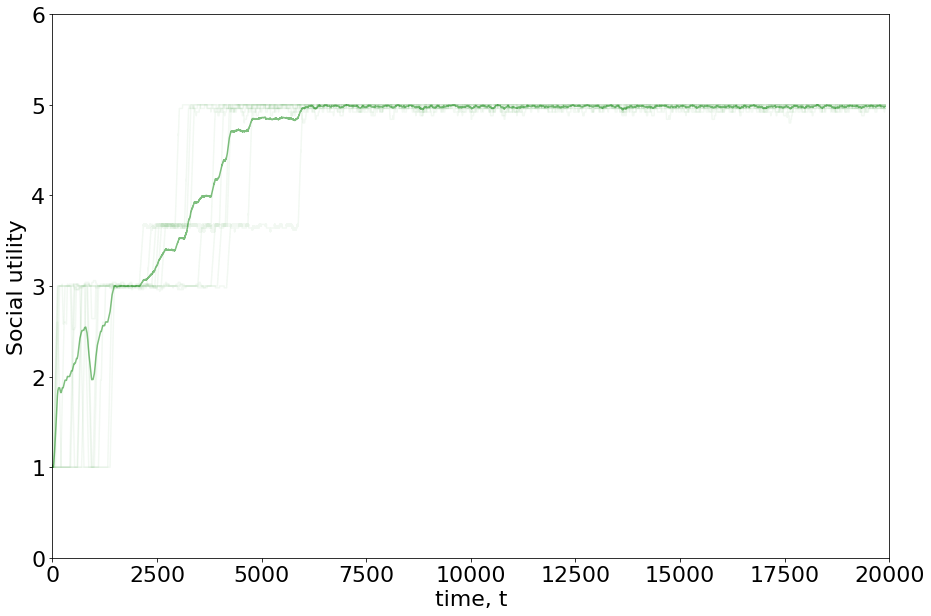

In [22]:
plot_social_ut(sut, path='img/tft.png')

## Forgiviness

In [23]:
def do_exp(fv):
    
    N_EXP = 10

    r0ss_cit = []
    r1ss_ddo = []
    sut = []

    for n in range(N_EXP):

        batch_size = 1
        max_steps = 20
        gamma = 0.8

        # Reward matrix for the Iterated Prisoner's Dilemma
        ipd_rewards = np.array([[1.0, 0.], [6.0, 5.0]])
        #np.array([[5.0, 0.0], [6.0, 1.0]])

        env = RMG(max_steps=max_steps, payouts=ipd_rewards, batch_size=batch_size)
        env.reset()

        possible_actions = [0, 1]  # Defect or Cooperate

        #p0, p1 = TFT(possible_actions),TFT(possible_actions)
        #p0, p1 = Citizen(possible_actions, possible_actions, n_states=1, epsilon=0.1, rmx=ipd_rewards),\
        #         TFT(possible_actions,0.0)
        p0, p1 = Mem1FPLearningAgent(possible_actions, possible_actions,
                                    n_states=1, learning_rate=0.1, epsilon=0.7, gamma=gamma, dp=0.0), TFT(possible_actions,fv)




        n_iter = 1000

        r0s = []
        r1s = []
        suts = []

        a0s = []
        a1s = []

        a0_prev = None
        a1_prev = None

        # State = Memory

        for i in range(n_iter):

            # A full episode:
            done = False

            while not done:

                # Agents decide

                #a0 = p0.act()
                #a1 = p1.act()

                a0 = p0.act( (a0_prev,a1_prev) )
                a1 = p1.act( (a1_prev,a0_prev) )

                # World changes
                _, (r0, r1), done, _ = env.step(([a0], [a1]))

                # Agents learn

                p0.update((a0_prev, a1_prev), (a0, a1), (r0, r1), (a0,a1) )
                p1.update((a1_prev, a0_prev), (a1, a0), (r1, r0), (a1,a0) )

                #s = new_s  #stateless!

                #print(a0, a1)
                r0s.append(r0[0])
                r1s.append(r1[0])
                suts.append( (r0[0] + r1[0])/2.0 )

                a0s.append(a0)
                a1s.append(a1)



                a0_prev = a0
                a1_prev = a1


            env.reset()

        #print(n)
        r0ss_cit.append(r0s)
        r1ss_ddo.append(r1s)
        sut.append(suts)
    return sut, r0ss_cit, r1ss_ddo

In [24]:
grid = np.arange(0,1.1, 0.1)
sut = []
r1 = []
r0 = []

for i in grid:
    a,b,c = do_exp(i)
    sut.append(a)
    r0.append(b)
    r1.append(c)
    print(i)

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0


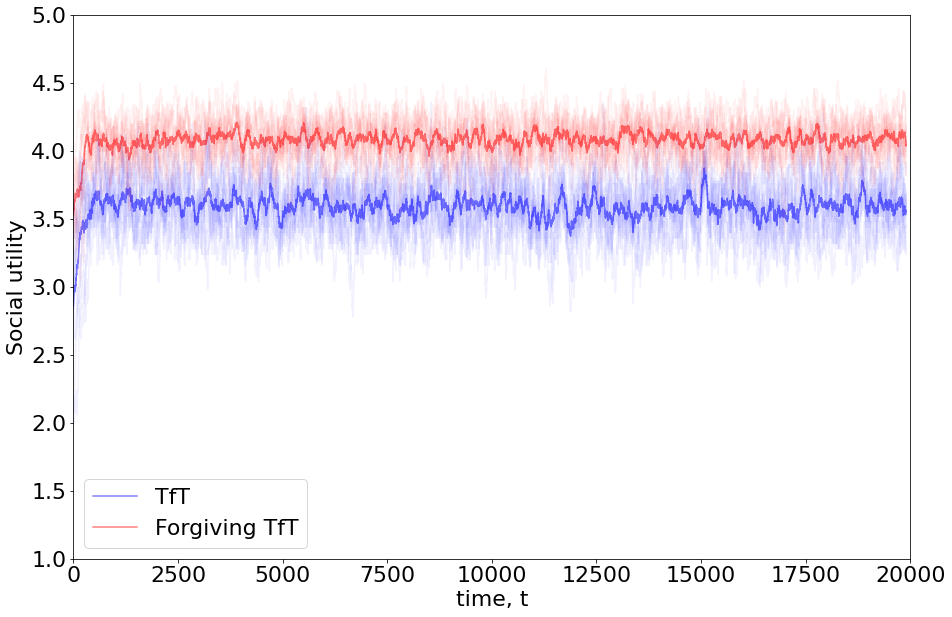

In [25]:
plot_several_ut([sut[0], sut[7]], path="img/forgiving_tft.png")